In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.options.display.max_columns = 100

from splitting import Splitting
from analysis import AnalysisMetrics
from hyperparams import Hyperparameters
from transforms import ClusterTransform
from modeling import Model 

print(pd.__version__)


0.24.2


In [2]:
# model = Model(model_name="Special Data")
# model.load()
# analysis_metrics = AnalysisMetrics(model=model,
#                                    reevaluate=True,
#                                    number_tests=100,
#                                    use_product_filter=True,
#                                    filter_threshold=300)
# analysis_metrics.plot_metrics(['r2'])

In [10]:
model = Model(model_name='Special Data')

params = {
 u'5Pyaterochka (X5)': {'colsample_bytree': 0.6000000000000001,
  'gamma': 0.9500000000000001,
  'learning_rate': 0.05,
  'max_depth': 4,
  'min_child_weight': 4.0,
  'n_estimators': 111,
  'reg_alpha': 0.9,
  'reg_lambda': 1.4500000000000002,
  'subsample': 0.5,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0},
 u'Dixy': {'colsample_bytree': 0.7000000000000001,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.08,
  'max_depth': 4,
  'min_child_weight': 8.0,
  'n_estimators': 63,
  'reg_alpha': 0.55,
  'reg_lambda': 1.1,
  'subsample': 0.55,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0},
 u'Lenta': {'colsample_bytree': 0.8,
  'gamma': 0.7000000000000001,
  'learning_rate': 0.08,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 137,
  'reg_alpha': 0.7000000000000001,
  'reg_lambda': 1.0,
  'subsample': 0.8,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.5},
 u'Okey Group': {'colsample_bytree': 0.5,
  'gamma': 1.0,
  'learning_rate': 0.09,
  'max_depth': 4,
  'min_child_weight': 1.0,
  'n_estimators': 98,
  'reg_alpha': 0.8,
  'reg_lambda': 1.1500000000000001,
  'subsample': 0.45,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0},
 'general_cluster': {'colsample_bytree': 0.8,
  'gamma': 0.8,
  'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 16.0,
  'n_estimators': 100,
  'reg_alpha': 0.5,
  'reg_lambda': 1.2000000000000002,
  'subsample': 0.75,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0}
}

model.create(
    params=params,
    feature_filename='./outputs/im_feature_info_dict_mars_ru_20210212.txt',
    target='total_units',
    cat_feature=['5Pyaterochka (X5)','Lenta','Dixy','Okey Group'],
    output_dir='outputs',
    data_filename='../data/20210212_mars_ru_prod_trainset.msgpack',
    filter_filename='./outputs/im_data_retrieval-v6-20210212.txt',
    future_data_filename='../data/20210212_mars_ru_prod_futureset.msgpack',
    future_target='total_units_2')

Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 


In [11]:
model.features

[u'multi_buy_y',
 u'original_pid',
 u'account_id',
 u'standard_niv',
 u'original_product_dimension_24',
 u'original_product_dimension_25',
 u'original_product_dimension_26',
 u'baseline_units',
 u'mechanism',
 u'week_agg_8',
 u'discount_perc_cohort',
 u'promotion_type',
 u'consumer_length',
 u'previous_promotion_week_distance',
 u'base_price']

In [3]:
features = [
    u'original_pid',
    u'account_id',
    u'original_product_dimension_25',
    u'original_product_dimension_26',
    u'week_agg_8',
    u'baseline_units',
    u'consumer_length',
    u'promotion_type',
    u'discount_perc_cohort',
    u'promoted_niv',
    u'previous_promotion_week_distance',
    u'total_nr_products'
]
model.set_features(features)
model.apply_account_filter(['5Pyaterochka (X5)','Lenta','Dixy','Okey Group','Magnit'])

duplication_map = {
    'Okey Group': ['5Pyaterochka (X5)','Dixy', 'Okey Group'],
    'Lenta': ['Lenta'],
    '5Pyaterochka (X5)': ['5Pyaterochka (X5)', 'Lenta', 'Dixy', 'Okey Group', 'Magnit'],
    'Dixy': ['5Pyaterochka (X5)', 'Lenta', 'Dixy', 'Okey Group', 'Magnit'],
}
model.set_duplication_map(duplication_map)

Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 
The duplication map accepted (will be executed before the trainig)


In [4]:
model.data['cluster'].unique()

array([u'5Pyaterochka (X5)', u'Lenta', u'Dixy', u'Okey Group',
       'general_cluster'], dtype=object)

In [5]:
# data_duplicate = {
#     'Okey Group': ['5Pyaterochka (X5)','Dixy', 'Okey Group'],
#     'Lenta': ['Lenta'],
#     '5Pyaterochka (X5)': ['5Pyaterochka (X5)', 'Lenta', 'Dixy', 'Okey Group', 'Magnit'],
#     'Dixy': ['5Pyaterochka (X5)', 'Lenta', 'Dixy', 'Okey Group', 'Magnit'],
# }

# print("initial data len = {}".format(model.data.shape[0]))
# new_data = model.data.copy()
# num_added = 0
# for account in data_duplicate.keys():
#     print("account = {}".format(account))
#     dups = data_duplicate[account]
#     for dup in dups:
#         if dup == account:
#             print('passed')
#             continue
#         df = model.data[model.data['account_banner']==dup]
#         print("dup = {}, len = {}".format(dup, df.shape[0]))
#         df['cluster'] = account
#         new_data = pd.concat([new_data, df], axis=0)
#         num_added += df.shape[0]
# print("new data len = {}".format(new_data.shape[0]))
# print("added = {}".format(num_added))

# # new_data = new_data[~new_data['cluster'].isin(['general_cluster'])]

In [7]:
model.data.groupby(['cluster','account_banner']).size()

cluster            account_banner   
5Pyaterochka (X5)  5Pyaterochka (X5)     83
Dixy               Dixy                 139
Lenta              Lenta                354
Okey Group         Okey Group           147
general_cluster    Magnit                82
dtype: int64

In [6]:
# print("test len before = {}".format(new_data.shape[0]))
# new_data = new_data.drop('cluster', axis=1).drop_duplicates()
# print("test len after = {}".format(new_data.shape[0]))

In [5]:
# model.apply_account_filter(['5Pyaterochka (X5)','Lenta','Dixy'])

duplication_map = {
    'Okey Group': ['5Pyaterochka (X5)','Dixy', 'Okey Group'],
    'Lenta': ['Lenta'],
    '5Pyaterochka (X5)': ['5Pyaterochka (X5)', 'Lenta', 'Dixy', 'Okey Group', 'Magnit'],
    'Dixy222': ['5Pyaterochka (X5)', 'Lenta', 'Dixy', 'Okey Group', 'Magnit'],
}
model.set_duplication_map(duplication_map)

The duplication map accepted (will be executed before the trainig)


In [7]:
new_data.reset_index(inplace=True, drop=True)

In [9]:
# model.clusters
model.cat_feature

['5Pyaterochka (X5)', 'Lenta', 'Dixy', 'Okey Group']

In [6]:
# model.data = new_data.copy()
model.train()

Duplicating the data...
account = Dixy222
skipped (Dixy222 not in clusters)
account = 5Pyaterochka (X5)
skipped (5Pyaterochka (X5) == account)
dup = Lenta, len = 1062
dup = Dixy, len = 417
dup = Okey Group, len = 441
dup = Magnit, len = 246
account = Lenta
skipped (Lenta == account)
account = Okey Group
dup = 5Pyaterochka (X5), len = 249
dup = Dixy, len = 417
skipped (Okey Group == account)
Initial data len: 2415
New data len: 5247 (added: 2832)
Model for 5Pyaterochka (X5) trained
Model for Dixy trained
Model for Lenta trained
Model for Okey Group trained
Model for general_cluster trained
The model is trained


In [10]:
analysis_metrics = AnalysisMetrics(model=model,
                                   reevaluate=True,
                                   number_tests=100,
                                   use_product_filter=True,
                                   filter_threshold=300)

model.update_info(analysis_metrics)
model.save()

Data filter initializing...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100
Test iteration 81 of 100
Test iteration 86 of 100
Test iteration 91 of 100
Test iteration 96 of 100
Future data filter initializing...
Evaluating the Model for historic data...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100

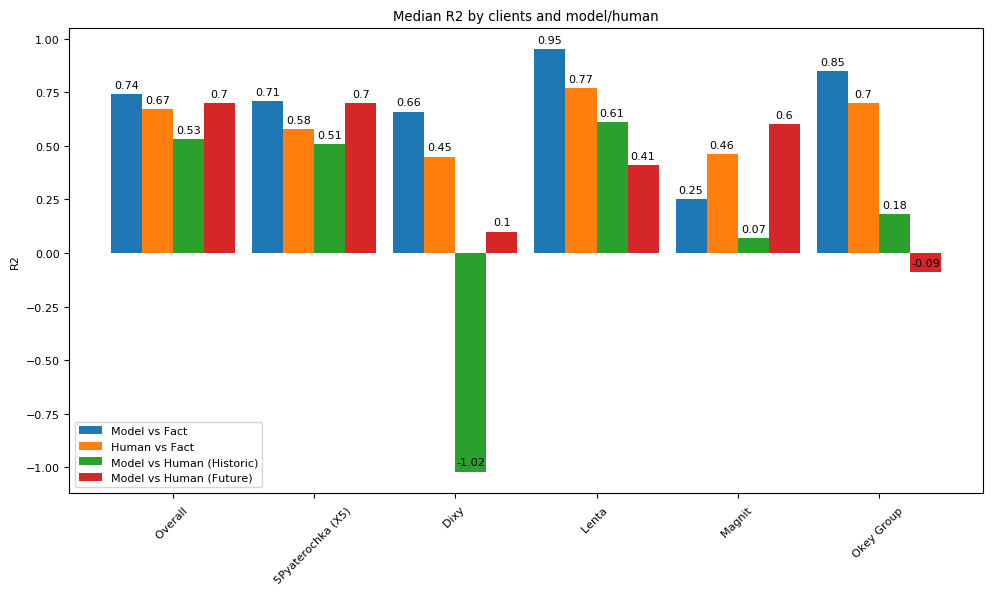

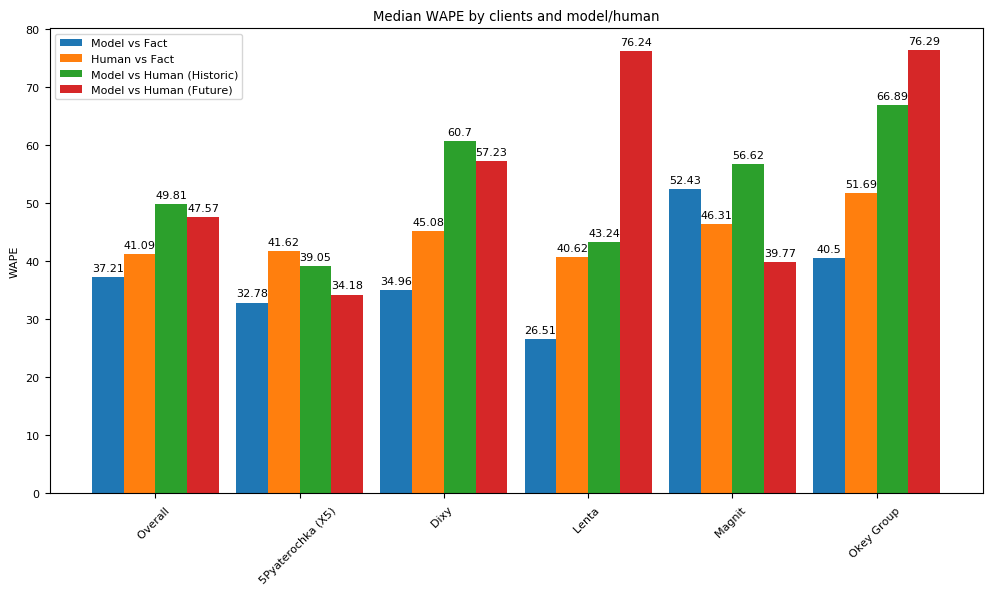

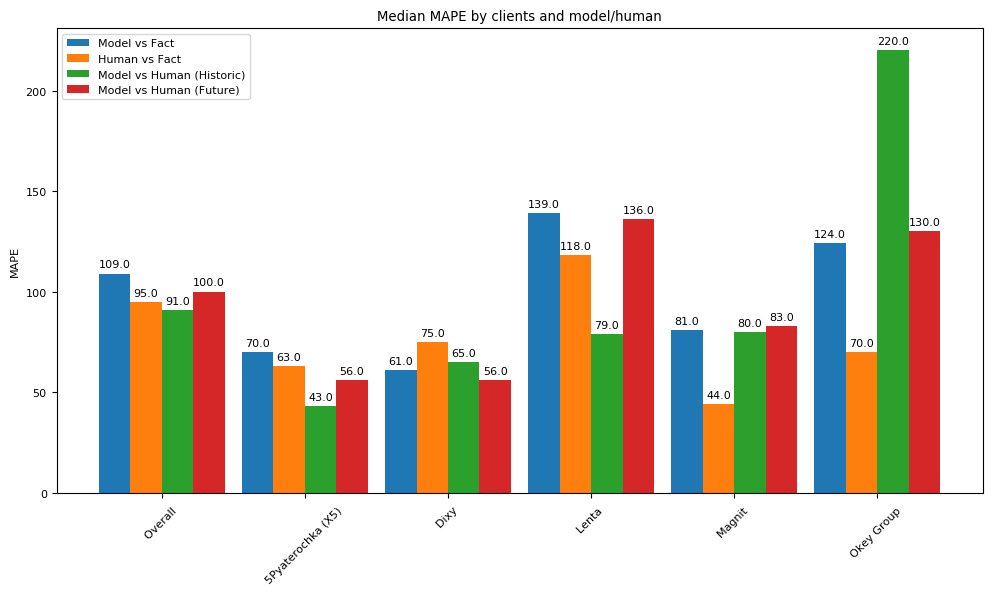

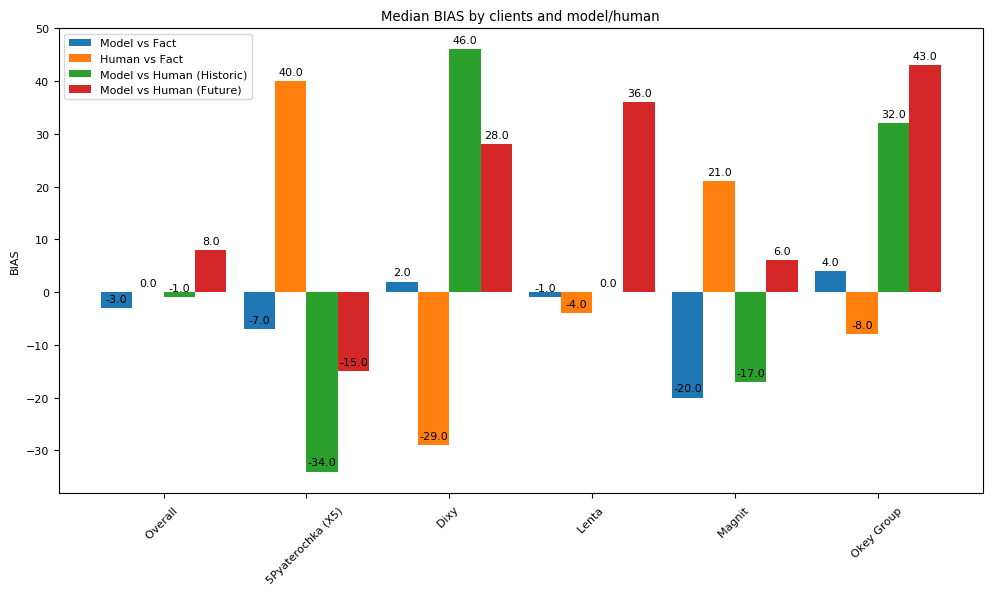

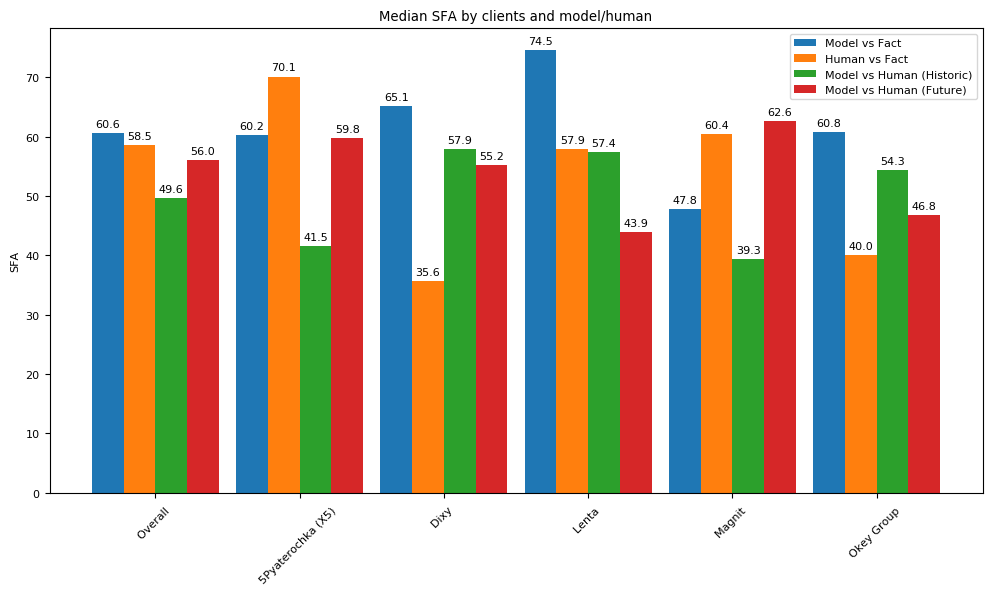

In [12]:
analysis_metrics.plot_metrics()

In [14]:
raise Exception("The 'Features' variable type should be a list")

Exception: The 'Features' variable type should be a list

# Another block

In [2]:
model = Model(model_name='test 2')

model.create(
    params=None,
    feature_filename='./outputs/im_feature_info_dict_mars_ru_20210212.txt',
    target='total_units',
    cat_feature=['5Pyaterochka (X5)'],
    output_dir='outputs',
    data_filename='../data/20210212_mars_ru_prod_trainset.msgpack',
    filter_filename='./outputs/im_data_retrieval-v6-20210212.txt',
    future_data_filename='../data/20210212_mars_ru_prod_futureset.msgpack',
    future_target='total_units_2')

features = [
    u'original_pid',
    u'account_id',
    u'original_product_dimension_25',
    u'original_product_dimension_26',
    u'week_agg_8',
    u'baseline_units',
    u'consumer_length',
    u'promotion_type',
    u'discount_perc_cohort',
    u'promoted_niv',
    u'previous_promotion_week_distance',
    u'total_nr_products'
]
model.set_features(features)
model.apply_account_filter(['5Pyaterochka (X5)','Lenta','Dixy','Okey Group','Magnit'])

Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 
Calculate cluster...


In [3]:
model.train()

df: 805, train: 542, val: 263
Checking 5Pyaterochka (X5) ...
100%|██████████| 20/20 [00:09<00:00,  2.14trial/s, best loss: 246379.65625]
Checking general_cluster ...
100%|██████████| 20/20 [00:07<00:00,  2.51trial/s, best loss: 54411.839844]
Model for 5Pyaterochka (X5) trained


No handlers could be found for logger "vf_portalytics.ml_helpers"


Model for general_cluster trained
The model is trained


Data filter initializing...
Test iteration 1 of 10
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Test iteration 6 of 10
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Future data filter initializing...
Calculate cluster...
Evaluating the Model for historic data...
Test iteration 1 of 10
Model for 5Pyaterochka (X5) trained
Model for general_cluster trained
Model for 5Pyaterochka (X5) trained

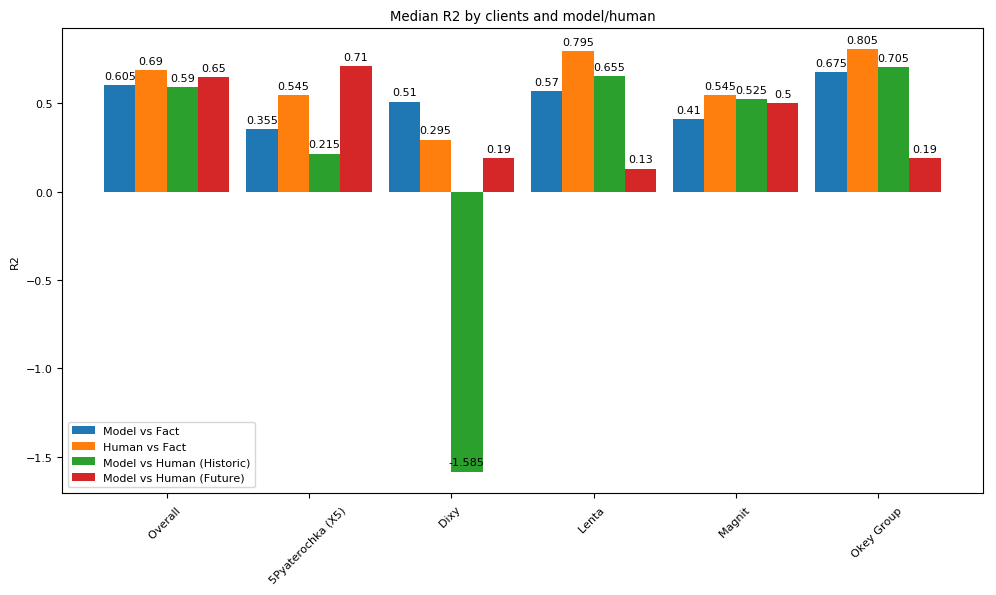

In [4]:
analysis_metrics = AnalysisMetrics(model=model)
analysis_metrics.plot_metrics(metric_filter=['r2'])

In [7]:
if 'cluster' in model.data.columns:
    print(1)

1


Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 
Model for 5Pyaterochka (X5) trained
Model for Dixy trained
Model for Lenta trained
Model for Magnit trained
Model for Metro trained
Model for Okey Group trained
The model is trained
Data filter initializing...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100
Test iteration 81 of 100
Test iteration 86 of 100
Test iteration 91 of 100
Test iteration 96 of

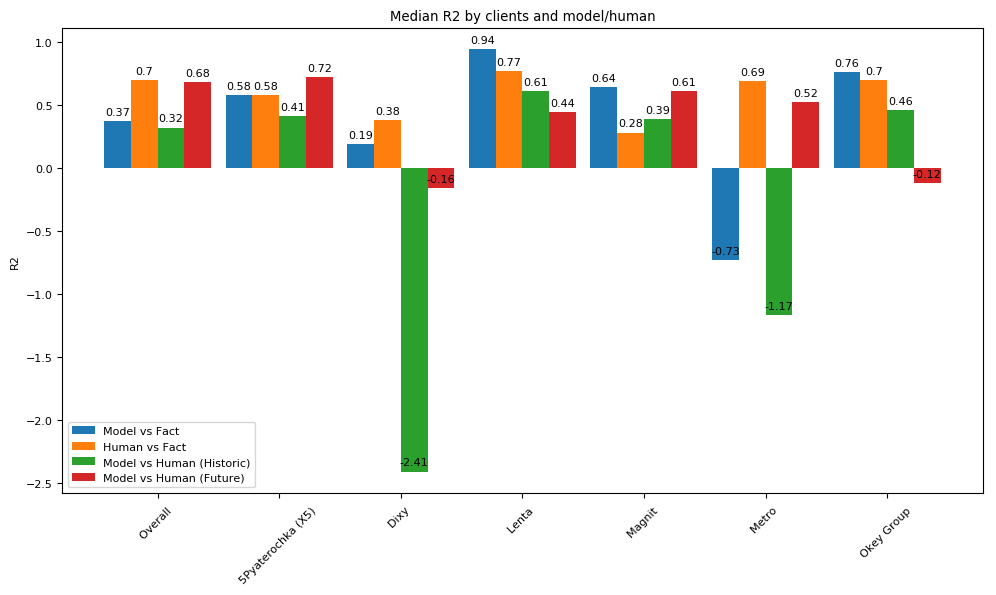

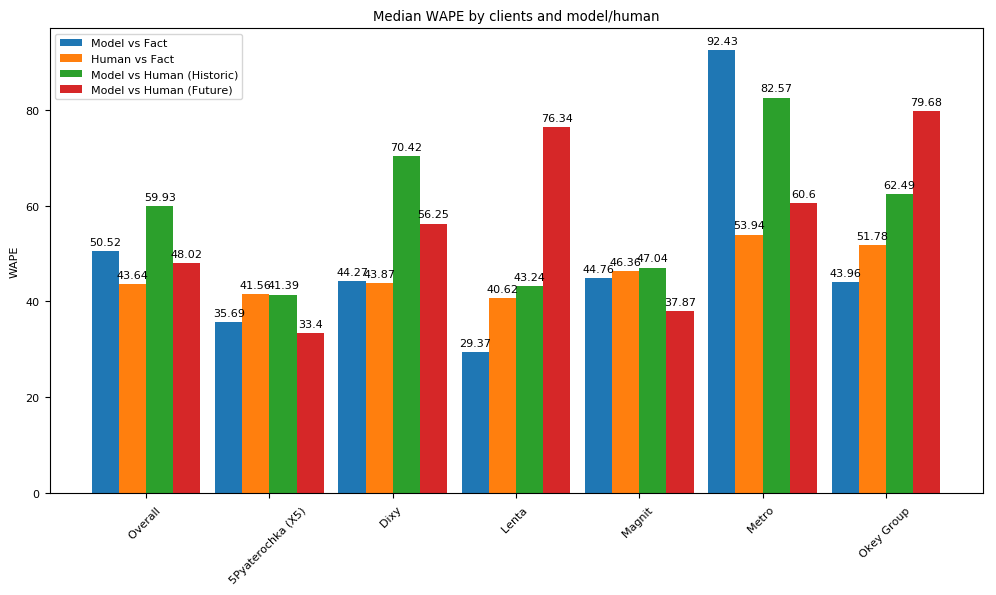

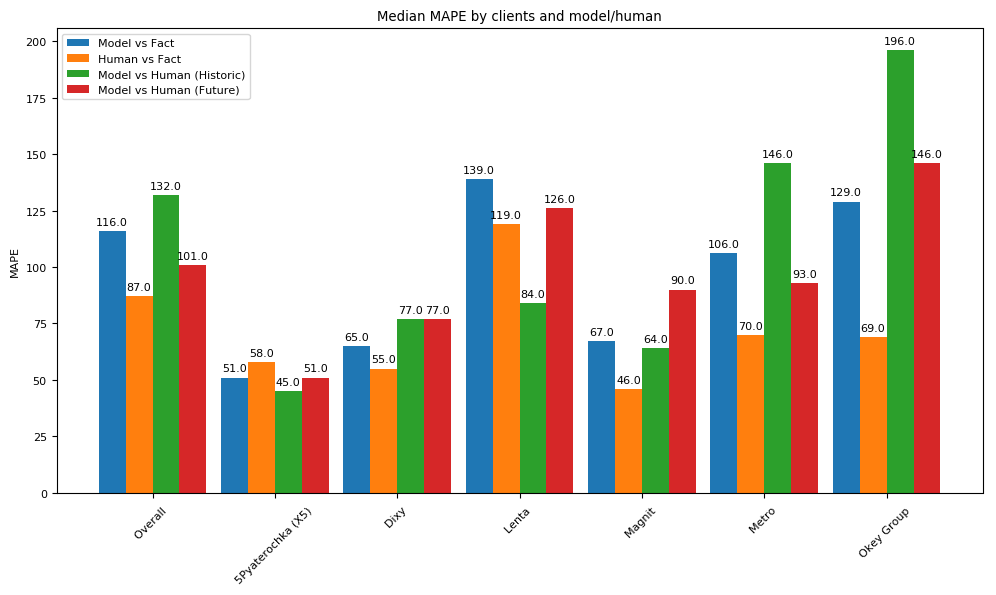

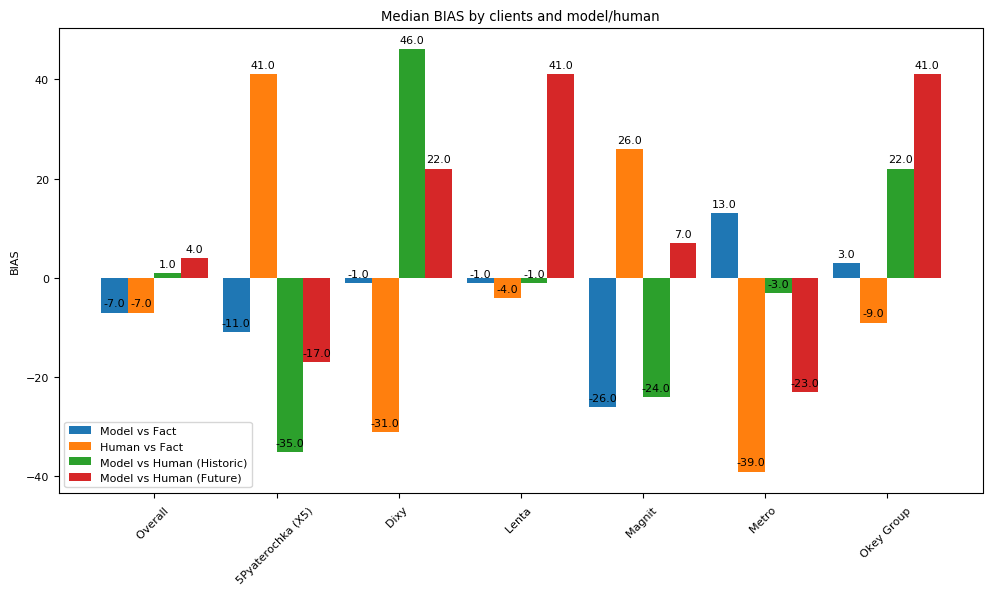

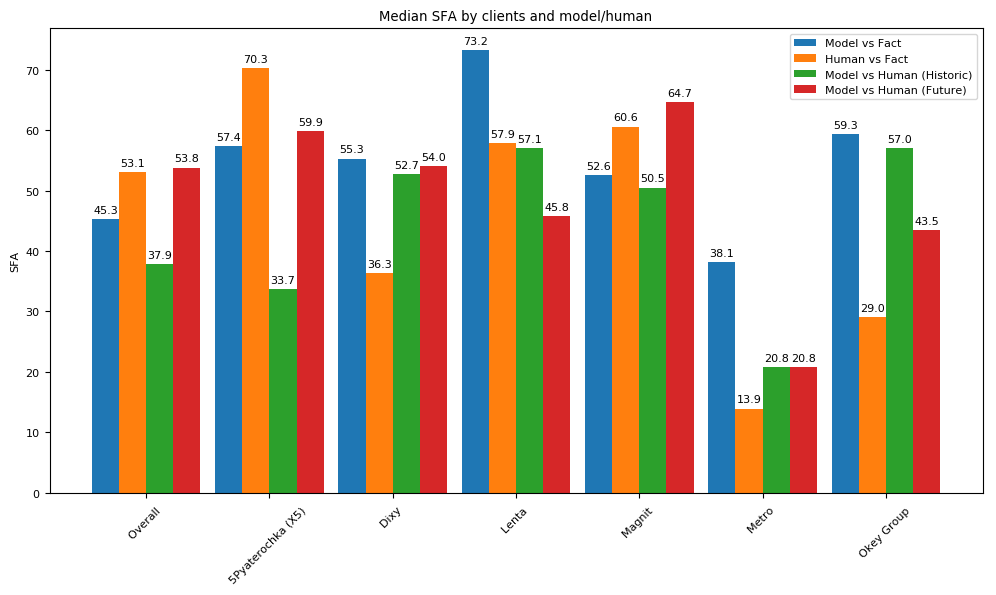

AssertionError: 

In [5]:
model = Model(model_name="20210212_im_mru_account")

# params = {0.0: {'colsample_bytree': 0.75,
#   'gamma': 0.8500000000000001,
#   'learning_rate': 0.06,
#   'max_depth': 3,
#   'min_child_weight': 19.0,
#   'n_estimators': 45,
#   'reg_alpha': 0.65,
#   'reg_lambda': 1.2000000000000002,
#   'subsample': 0.8,
#   'transformer_nominal': 'TargetEncoder',
#   'transformer_ordinal': 'OrdinalEncoder',
#   'under_predict_weight': 2.5}}

params = {u'5Pyaterochka (X5)': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Dixy': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Lenta': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Magnit': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Metro': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Okey Group': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0}}

model.create(
    params=params,
    feature_filename='./outputs/im_feature_info_dict_mars_ru_20210212.txt',
    target='total_units',
    cat_feature='account_banner',
    output_dir='outputs',
    data_filename='../data/20210212_mars_ru_prod_trainset.msgpack',
    filter_filename='./outputs/im_data_retrieval-v6-20210212.txt',
    future_data_filename='../data/20210212_mars_ru_prod_futureset.msgpack',
    future_target='total_units_2')

features = [
    u'original_pid',
    u'account_id',
    u'original_product_dimension_25',
    u'original_product_dimension_26',
    u'week_agg_8',
    u'baseline_units',
    u'consumer_length',
    u'promotion_type',
    u'discount_perc_cohort',
    u'promoted_niv',
    u'previous_promotion_week_distance',
    u'total_nr_products'
]

model.set_features(features)
# model.apply_account_filter(['5Pyaterochka (X5)','Lenta','Dixy','Okey Group','Magnit'])

model.train()

analysis_metrics = AnalysisMetrics(model=model,
                                   number_tests=100,
                                   use_product_filter=True,
                                   filter_threshold=300)
model.update_info(analysis_metrics)
model.save()

analysis_metrics.plot_metrics()

assert False

In [6]:
model.save('20210212_im_mru_accounts_all_params_as_for_lenta')

The model is saved


In [ ]:
# dir(model)
# model.clusters
# model.cat_feature
# model.selected_features
# model.params

In [9]:
# Load the model
model = Model(model_name="20210212_im_mru_accounts_all_params_as_for_lenta")
model.load()
model.apply_account_filter(['5Pyaterochka (X5)', u'Lenta', u'Dixy', u'Okey Group', u'Magnit'])
model.get_info()

Filtered due to status of promotion
Filtered due to products not exist in train dataset
Filtered due to excluded flag
Filtered due to zero planned baseline
Filtered due to zero planned in-store total volume
Filtered due to planned in-store total volume lower then baseline
Future dataset length: 
The model is loaded
--- Model Information ---
Name: 20210212_im_mru_accounts_all_params_as_for_lenta
feature_filename: ./outputs/im_feature_info_dict_mars_ru_20210212.txt
output_dir: outputs
data_filename : ../data/20210212_mars_ru_prod_trainset.msgpack
filter_filename : ./outputs/im_data_retrieval-v6-20210212.txt
target : total_units
future_data_filename : ../data/20210212_mars_ru_prod_futureset.msgpack
future_target : total_units_2
filter_data : Defined
filter_future_data : Defined
metrics_data : Defined
metrics_future_data : Defined
account_filter : ['5Pyaterochka (X5)', u'Lenta', u'Dixy', u'Okey Group', u'Magnit']
-------------------------


Evaluating the Model for historic data...
Test iteration 1 of 100
Test iteration 6 of 100
Test iteration 11 of 100
Test iteration 16 of 100
Test iteration 21 of 100
Test iteration 26 of 100
Test iteration 31 of 100
Test iteration 36 of 100
Test iteration 41 of 100
Test iteration 46 of 100
Test iteration 51 of 100
Test iteration 56 of 100
Test iteration 61 of 100
Test iteration 66 of 100
Test iteration 71 of 100
Test iteration 76 of 100
Test iteration 81 of 100
Test iteration 86 of 100
Test iteration 91 of 100
Test iteration 96 of 100
Evaluating the Model for future data...


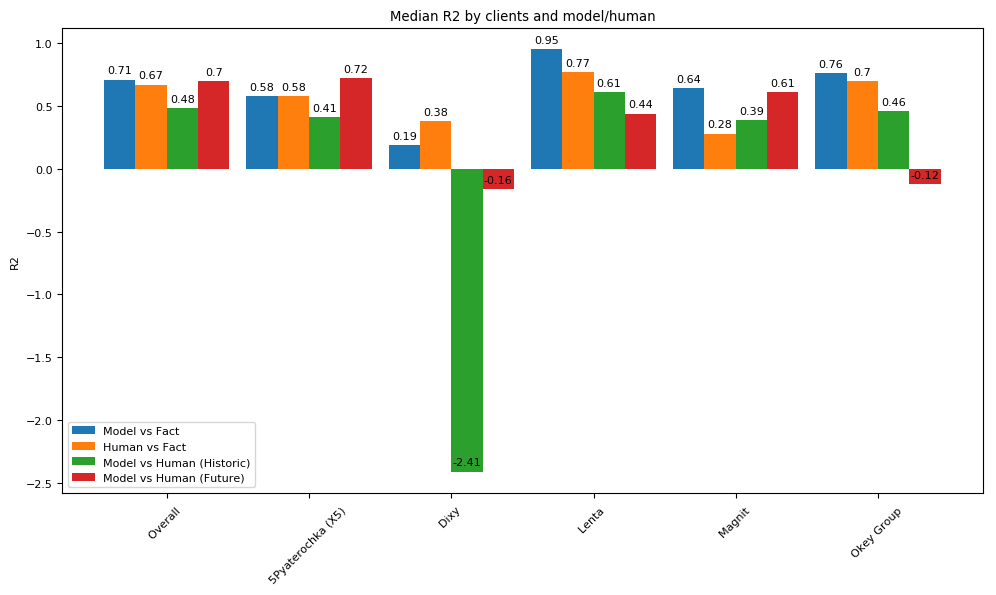

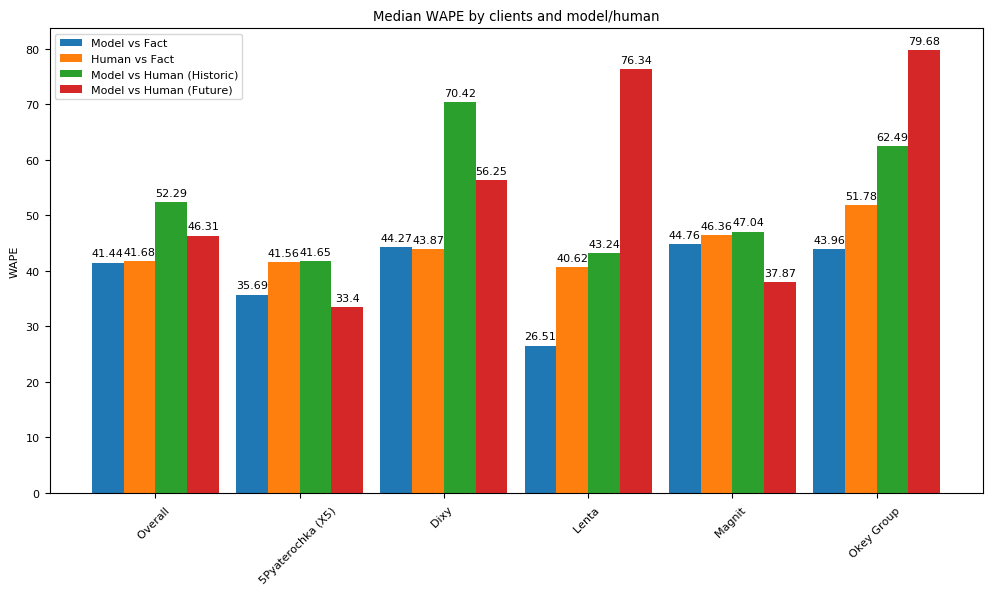

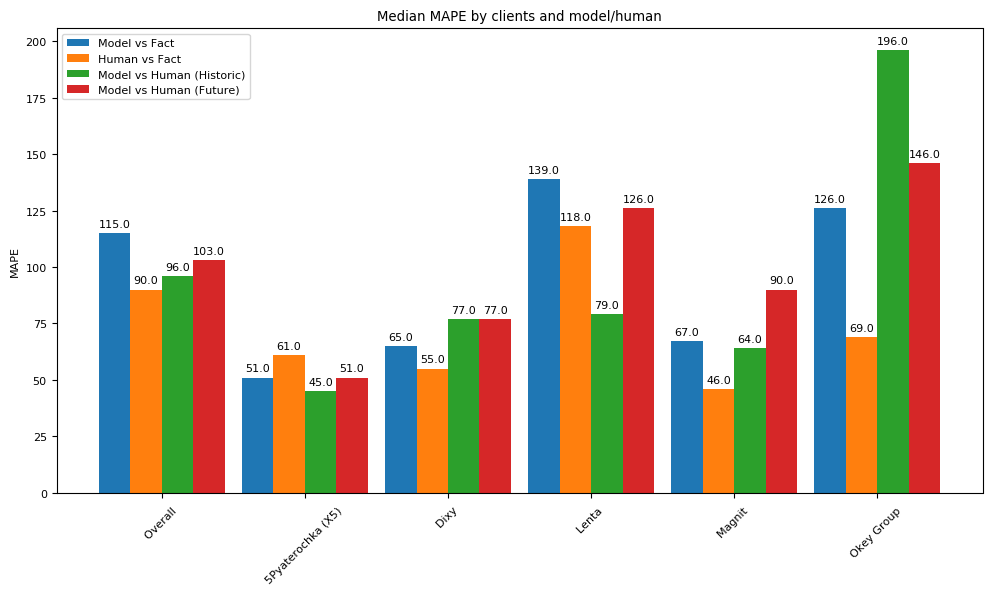

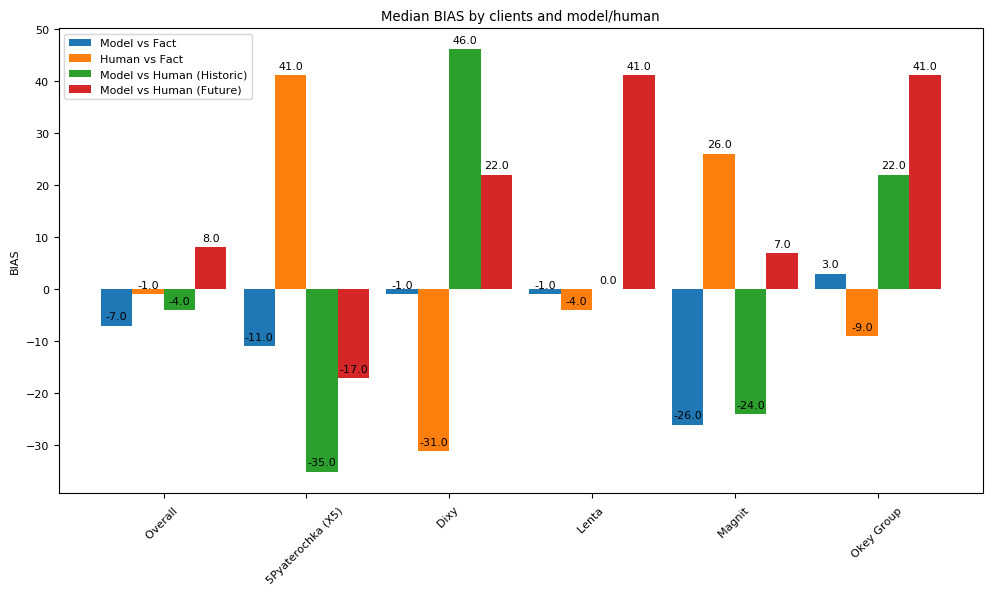

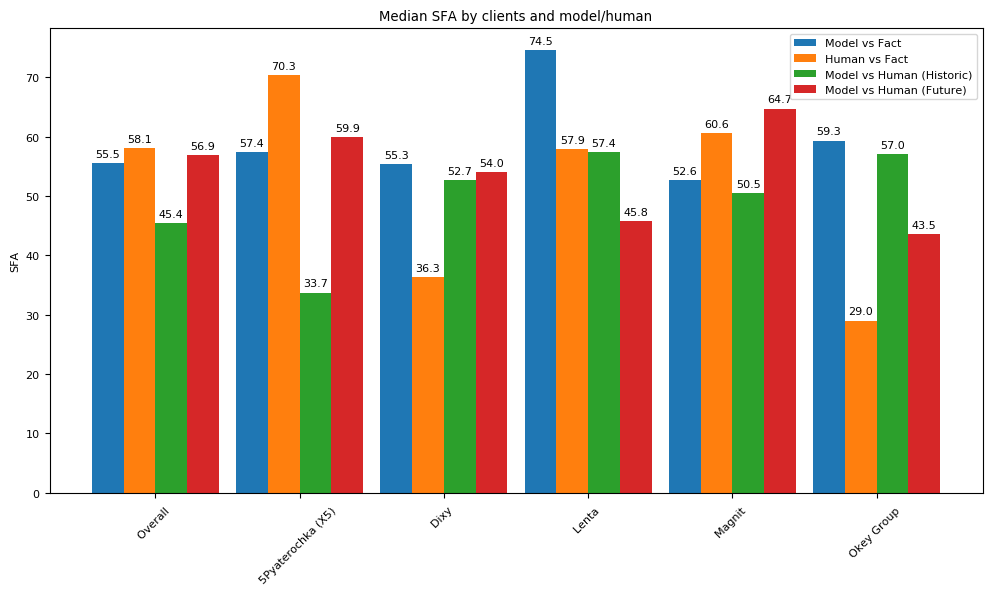

In [11]:
analysis_metrics = AnalysisMetrics(model=model,
                                   reevaluate=True,
                                   number_tests=100,
                                   use_product_filter=True,
                                   filter_threshold=300)

analysis_metrics.plot_metrics()

In [12]:
model.update_info(analysis_metrics)
model.save()

The model is saved


In [ ]:
assert False

In [ ]:
analysis_metrics.plot_metrics()
# analysis_metrics.metric_quantiles('r2')
# analysis_metrics.median_overall_metrics()
# analysis_metrics.median_account_metrics()
# model.get_accounts()

In [ ]:
params = {u'5Pyaterochka (X5)': {'colsample_bytree': 0.75,
  'gamma': 0.7000000000000001,
  'learning_rate': 0.1,
  'max_depth': 2,
  'min_child_weight': 2.0,
  'n_estimators': 52,
  'reg_alpha': 0.8,
  'reg_lambda': 1.2000000000000002,
  'subsample': 0.6000000000000001,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.5},
 u'Dixy': {'colsample_bytree': 0.5,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.07,
  'max_depth': 4,
  'min_child_weight': 2.0,
  'n_estimators': 122,
  'reg_alpha': 0.8,
  'reg_lambda': 1.2000000000000002,
  'subsample': 0.65,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0},
 u'Lenta': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.06,
  'max_depth': 2,
  'min_child_weight': 1.0,
  'n_estimators': 55,
  'reg_alpha': 0.9500000000000001,
  'reg_lambda': 1.3,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'JamesSteinEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Magnit': {'colsample_bytree': 0.8,
  'gamma': 0.7000000000000001,
  'learning_rate': 0.07,
  'max_depth': 2,
  'min_child_weight': 20.0,
  'n_estimators': 160,
  'reg_alpha': 0.5,
  'reg_lambda': 1.05,
  'subsample': 0.8,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0},
 u'Metro': {'colsample_bytree': 0.65,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.09,
  'max_depth': 2,
  'min_child_weight': 2.0,
  'n_estimators': 11,
  'reg_alpha': 1.0,
  'reg_lambda': 1.4000000000000001,
  'subsample': 0.45,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 3.0},
 u'Okey Group': {'colsample_bytree': 0.8,
  'gamma': 0.8500000000000001,
  'learning_rate': 0.08,
  'max_depth': 4,
  'min_child_weight': 1.0,
  'n_estimators': 34,
  'reg_alpha': 0.8,
  'reg_lambda': 1.2000000000000002,
  'subsample': 0.7000000000000001,
  'transformer_nominal': 'TargetEncoder',
  'transformer_ordinal': 'OrdinalEncoder',
  'under_predict_weight': 2.0}}